# 04. Error Estimator 
In this notebook we load the data from the json-files for RF and XGB respectively. After combining the data we plot different boxplots and calculate the difference of the means between stratified vs. unstratifed of the evaluation metrics.

## Load json data for RF and XGB

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_boxplots import flatten_data, plot_eval
import numpy as np
import seaborn as sns
from tabulate import tabulate

# remove waringns
import warnings
warnings.filterwarnings("ignore")


#### First: Random Forest
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_rf = pd.DataFrame(data_all_flatten)
print('Shape of data', df_rf.shape)
print('Colum names of data', df_rf.columns)
print('Number of Colums', df_rf.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_rf.astype(str).duplicated().sum())


df_rf.head()

Shape of data (4800, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,30,...,0.877017,0.025,1.0,0.957862,2,1,8,2,1,6
1,rf,200,100000,8,0,identity,5,5,200,30,...,0.874369,0.025,1.0,0.947189,4,1,7,5,1,6
2,rf,200,100000,8,0,identity,5,5,200,30,...,0.897163,0.025,1.0,0.959497,2,1,7,2,1,7
3,rf,200,100000,8,0,identity,5,5,200,30,...,0.886524,0.025,1.0,0.955489,2,1,6,2,1,5
4,rf,200,100000,8,0,identity,5,5,200,30,...,0.881115,0.025,1.0,0.964351,2,1,7,4,1,5


In [2]:
#### Second: XGBoost
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/xgb/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_xgb = pd.DataFrame(data_all_flatten)
print('Shape of data', df_xgb.shape)
print('Colum names of data', df_xgb.columns)
print('Number of Colums', df_xgb.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_xgb.astype(str).duplicated().sum())


df_xgb.head()

Shape of data (4800, 87)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_best_params_max_depth,unstratified_best_params_learning_rate,unstratified_best_params_gamma,unstratified_best_params_colsample_bytree,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree
0,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.000000,0.687279,0.847472,2,2,0.311333,1.000000,0.982669
1,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,3.786479,0.982669,0.729761,6,2,0.222667,3.786479,0.982669
2,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,1.945888,0.548831,0.997877,2,2,0.222667,1.000000,0.585893
3,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.945888,0.982669,0.997877,4,2,0.134000,1.000000,0.517950
4,xgb,200,100000,8,0,identity,5,5,200,20,...,17,0.178333,1.394951,0.976185,0.697330,6,3,0.222667,1.394951,0.548831


In [3]:
# combine rf and xgb data
data = pd.concat([df_rf, df_xgb], axis=0, ignore_index=True)
original_shape = data.shape[0]

In [4]:
# capitizle model name for plots
data['model_info_model'] = data['model_info_model'].str.upper()

In [5]:
# opitonal: exclude all rows if hyperparmeters are the same
exclude_hyp_dame = False
if exclude_hyp_dame:
    data = data[data['hyperparameters_same'] == False]
    data = data.reset_index(drop=True) #reset index of data
    print('Original shape: ', original_shape)
    print('Shape after removing hyperparameters that are the same: ', data.shape[0])
    print('Percetage', data.shape[0]/original_shape)
    data.head()
 

In [6]:
# creat unique identifier for plots
model_vars = ['model_info_n_train',	'model_info_noise',	'model_info_group_size']
model_vars_title =  [s.rsplit('_', 1)[-1] for s in model_vars]

data['param_model'] = data.loc[:, model_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (9600, 100)


0    200_0_5
1    200_0_5
2    200_0_5
3    200_0_5
4    200_0_5
Name: param_model, dtype: object

## Analysis Estimation Error
Add colum with calculated error_estimator_stratified and their mean over the Random Search Iteratons:


In [75]:
data['error_estimator_stratified'] = data['param_model'] 
data['error_estimator_unstratified'] = data['param_model'] 

for i in range(len(data)):
    # Note: cv_stratified_iterations_mean_test_score is negagtive MSE, wherase cv_iteration_refit_test_mse is absolute MSE -> add two values
    # error estimate: stratified
    data['error_estimator_stratified'][i] =  [(x + y)**2 for x, y in zip(data['cv_stratified_iterations_mean_test_score'][i], data['cv_iteration_refit_test_mse'][i])]
    # error estimate: unstratified
    data['error_estimator_unstratified'][i]   = [(x + y)**2 for x, y in zip(data['cv_unstratified_iterations_mean_test_score'][i], data['cv_iteration_refit_test_mse'][i])]

print(len(data['error_estimator_stratified'][0]))
print(len(data['error_estimator_stratified']))


data['error_estimator_mean_stratified'] = data['error_estimator_stratified'].apply(lambda x: np.mean(x))
data['error_estimator_mean_unstratified'] = data['error_estimator_unstratified'].apply(lambda x: np.mean(x))

200
9600


### Boxplot RF vs. XGB

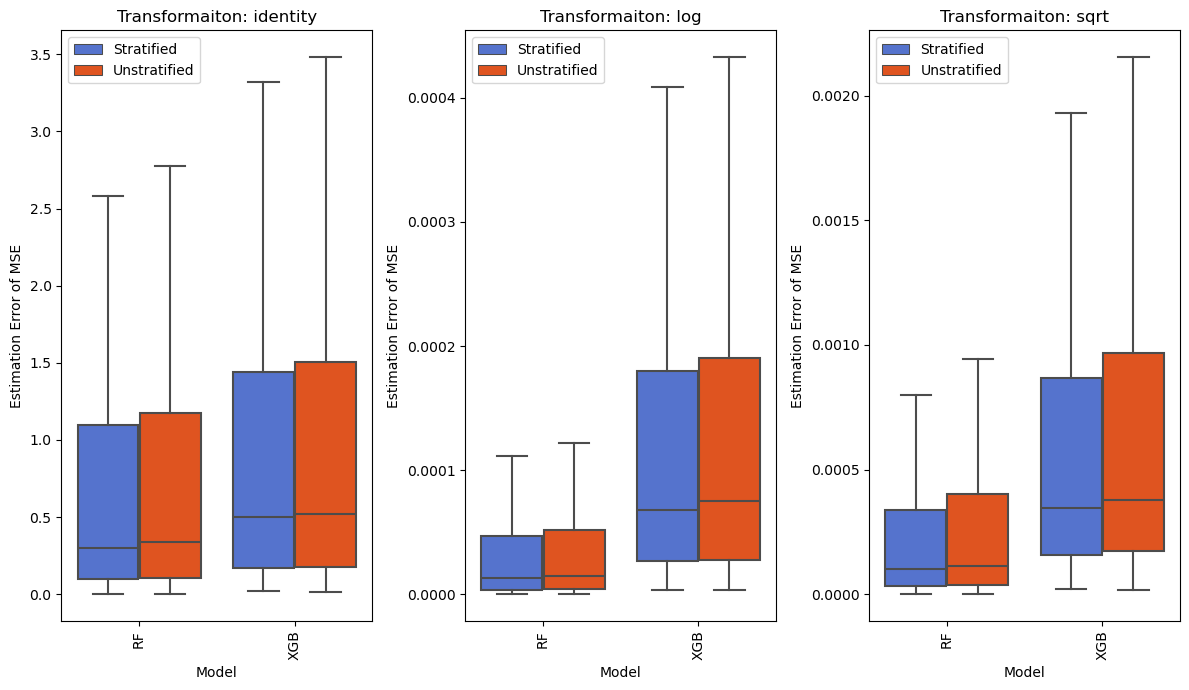

In [76]:
value_vars= ['error_estimator_mean_stratified', 'error_estimator_mean_unstratified']  
value_name = 'Estimation Error' 
figsize = (5, 6)
transformations = data['model_info_transformation'].unique()
differences_overview = pd.DataFrame()
plots_report_path = '/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/plots/report_plots/'
      
fig, axes = plt.subplots(1, 3, figsize=(12, 7))  # Create a 3x1 grid of subplots

for i, transformation in enumerate(transformations):
        data_filtered = data[data['model_info_transformation'] == transformation]
        data_long = data_filtered.melt(id_vars=['model_info_model'], 
                                                                   value_vars=value_vars, 
                                                                   var_name='Stratification', value_name=value_name)
        
        descriptives = data_long.groupby(['model_info_model', 'Stratification']).describe()
        keys = descriptives[value_name]['mean'].keys()
        descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('model_info_model'), 
                                                                           'Stratification': keys.get_level_values('Stratification').str.rsplit('_', n=1).str[-1], 
                                                                           'Mean': descriptives[value_name]['mean'].values, 
                                                                           'SD': descriptives[value_name]['std'].values})
        difference_mean = descriptives_table[descriptives_table['Stratification'] == 'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification'] == 'unstratified']['Mean'].values
        difference_sd = descriptives_table[descriptives_table['Stratification'] == 'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification'] == 'unstratified']['SD'].values
        differences = pd.DataFrame({'Transfromation': transformation, 'Expermintel Hyperparameter Combinaiton': keys.get_level_values('model_info_model').unique(), 
                                                                'Difference Mean': difference_mean, 
                                                                'Difference SD': difference_sd,
                                                                'Stratified': descriptives_table[descriptives_table['Stratification'] == 'stratified']['Mean'].values,
                                                                'Unstratified': descriptives_table[descriptives_table['Stratification'] == 'unstratified']['Mean'].values})
        differences_overview = pd.concat([differences_overview, differences])

        sns.boxplot(ax=axes[i], x=data_long['model_info_model'], 
                                y=data_long[value_name], 
                                hue=data_long['Stratification'], 
                                palette={value_vars[0]: 'royalblue', value_vars[1]: 'orangered'}, 
                                showfliers=False)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        axes[i].set_ylabel(value_name + ' of MSE')
        axes[i].set_xlabel('Model')
        axes[i].set_title('Transformaiton: ' + transformation)
        legend = axes[i].legend()
        for label in legend.get_texts():
                if label.get_text() == value_vars[0]:
                        label.set_text('Stratified')
                elif label.get_text() == value_vars[1]:
                        label.set_text('Unstratified')

plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig(plots_report_path + 'error_estimation_comparison_models.png')
plt.show()


In [77]:
differences_overview

,Transfromation,Expermintel Hyperparameter Combinaiton,Difference Mean,Difference SD,Stratified,Unstratified
0,identity,RF,-0.191453,-0.747593,1.178537,1.369989
1,identity,XGB,-0.082089,-0.295330,1.345669,1.427758
0,log,RF,-0.000006,-0.000007,0.000060,0.000066
1,log,XGB,-0.000013,-0.000029,0.000176,0.000189
0,sqrt,RF,-0.000037,-0.000009,0.000359,0.000396
1,sqrt,XGB,-0.000104,-0.000154,0.000797,0.000902


### Function: Boxpot Estimation Error per unique experimental parameter combination

RF


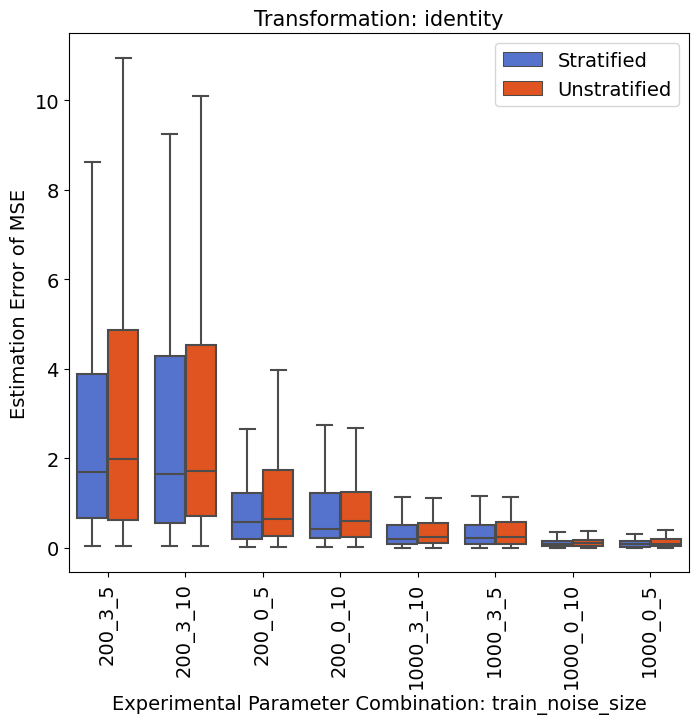

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
1                               1000_0_5        -0.015995      -0.007391   
3                               1000_3_5        -0.016160       0.016233   
0                              1000_0_10        -0.017973      -0.014962   
2                              1000_3_10        -0.044658      -0.038729   
4                               200_0_10        -0.136580      -0.209442   
5                                200_0_5        -0.239998      -0.211622   
6                               200_3_10        -0.484584      -1.134639   
7                                200_3_5        -0.575676      -1.773983   

   Stratified  Unstratified  
1    0.114048      0.130043  
3    0.415301      0.431461  
0    0.118066      0.136038  
2    0.405319      0.449977  
4    0.853509      0.990089  
5    0.952482      1.192480  
6    3.186668      3.671252  
7    3.382900      3.958576  
RF


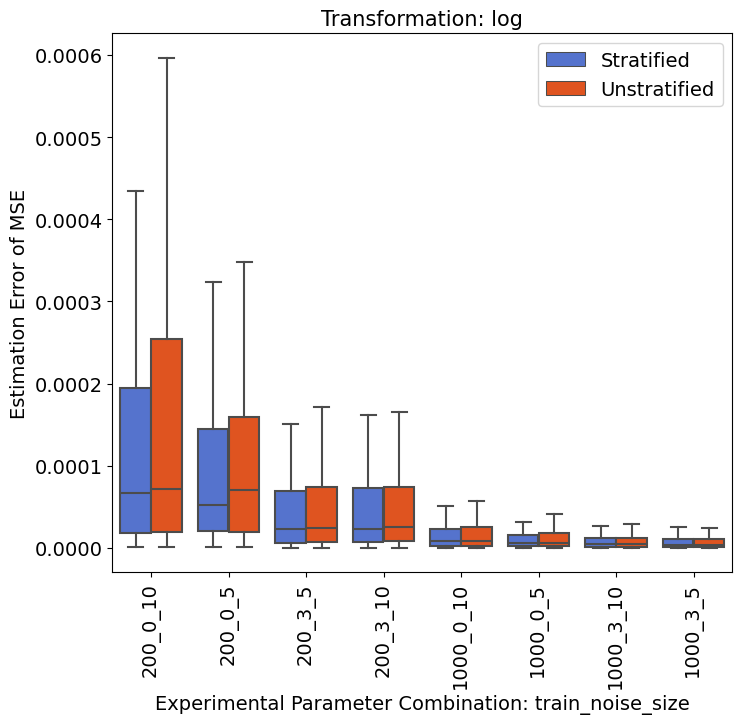

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
3                               1000_3_5    -6.098528e-07      -0.000002   
6                               200_3_10    -7.329069e-07       0.000027   
2                              1000_3_10    -1.138116e-06      -0.000004   
0                              1000_0_10    -1.666627e-06      -0.000001   
1                               1000_0_5    -2.041316e-06      -0.000002   
7                                200_3_5    -3.099007e-06       0.000012   
5                                200_0_5    -1.393378e-05      -0.000019   
4                               200_0_10    -2.342129e-05      -0.000028   

   Stratified  Unstratified  
3    0.000010      0.000010  
6    0.000065      0.000066  
2    0.000011      0.000012  
0    0.000016      0.000018  
1    0.000012      0.000014  
7    0.000079      0.000082  
5    0.000132      0.000146  
4    0.000159      0.000183  
RF


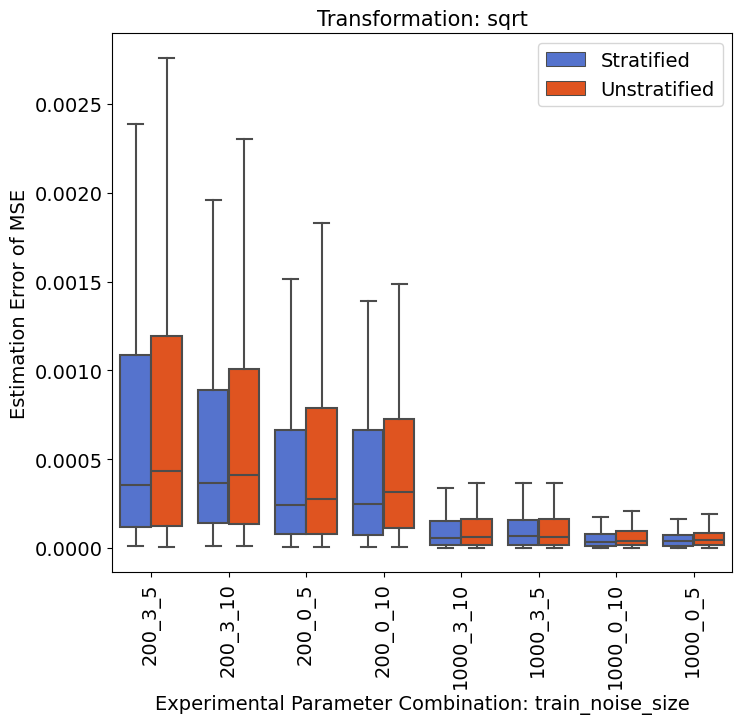

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
3                               1000_3_5        -0.000005      -0.000014   
1                               1000_0_5        -0.000007      -0.000004   
0                              1000_0_10        -0.000007      -0.000003   
2                              1000_3_10        -0.000007      -0.000010   
7                                200_3_5        -0.000037      -0.000003   
6                               200_3_10        -0.000040       0.000104   
4                               200_0_10        -0.000073      -0.000068   
5                                200_0_5        -0.000123      -0.000194   

   Stratified  Unstratified  
3    0.000109      0.000114  
1    0.000053      0.000060  
0    0.000055      0.000062  
2    0.000109      0.000116  
7    0.000850      0.000888  
6    0.000838      0.000878  
4    0.000435      0.000508  
5    0.000423      0.000546  
XGB


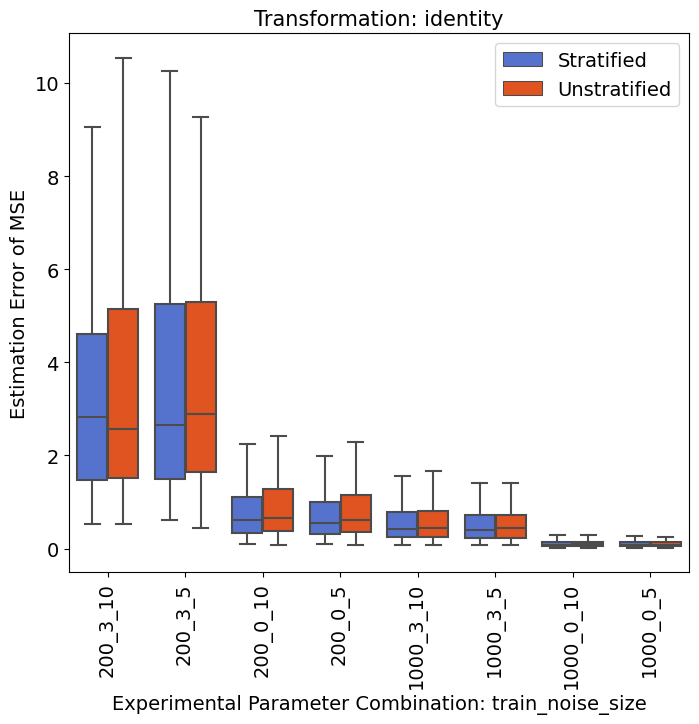

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
0                              1000_0_10        -0.005509      -0.005997   
1                               1000_0_5        -0.006062      -0.002184   
3                               1000_3_5        -0.007437      -0.008894   
2                              1000_3_10        -0.013739       0.013535   
5                                200_0_5        -0.066810      -0.048686   
4                               200_0_10        -0.067783      -0.042828   
6                               200_3_10        -0.092387      -0.438139   
7                                200_3_5        -0.396987      -0.822474   

   Stratified  Unstratified  
0    0.116733      0.122242  
1    0.110507      0.116570  
3    0.559764      0.567201  
2    0.642586      0.656325  
5    0.786194      0.853004  
4    0.848809      0.916592  
6    4.010839      4.103226  
7    3.689919      4.086906  
XGB


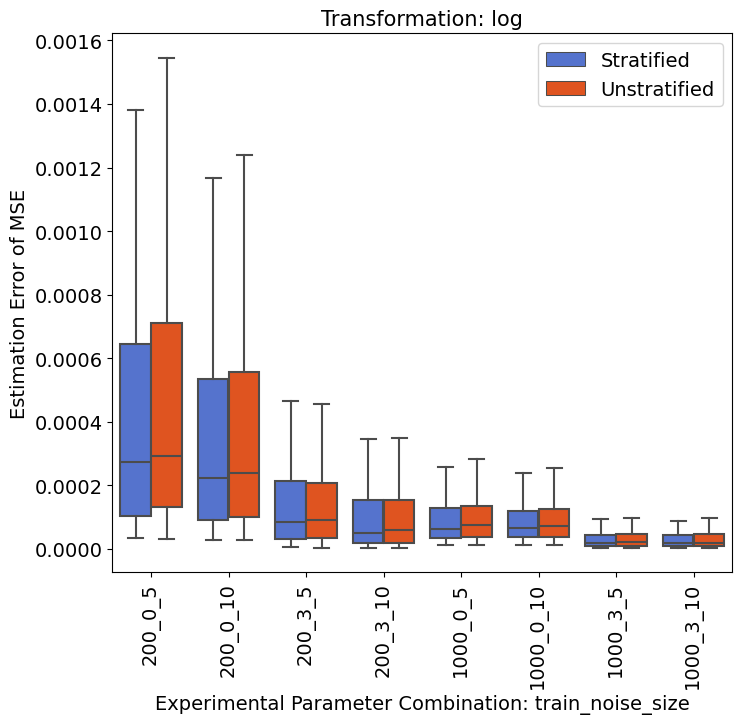

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
3                               1000_3_5        -0.000001      -0.000002   
2                              1000_3_10        -0.000001      -0.000003   
7                                200_3_5        -0.000003      -0.000005   
6                               200_3_10        -0.000004      -0.000005   
0                              1000_0_10        -0.000007      -0.000006   
1                               1000_0_5        -0.000010      -0.000008   
4                               200_0_10        -0.000037      -0.000043   
5                                200_0_5        -0.000044      -0.000055   

   Stratified  Unstratified  
3    0.000036      0.000037  
2    0.000035      0.000037  
7    0.000161      0.000164  
6    0.000135      0.000138  
0    0.000092      0.000099  
1    0.000095      0.000105  
4    0.000381      0.000418  
5    0.000472      0.000516  
XGB


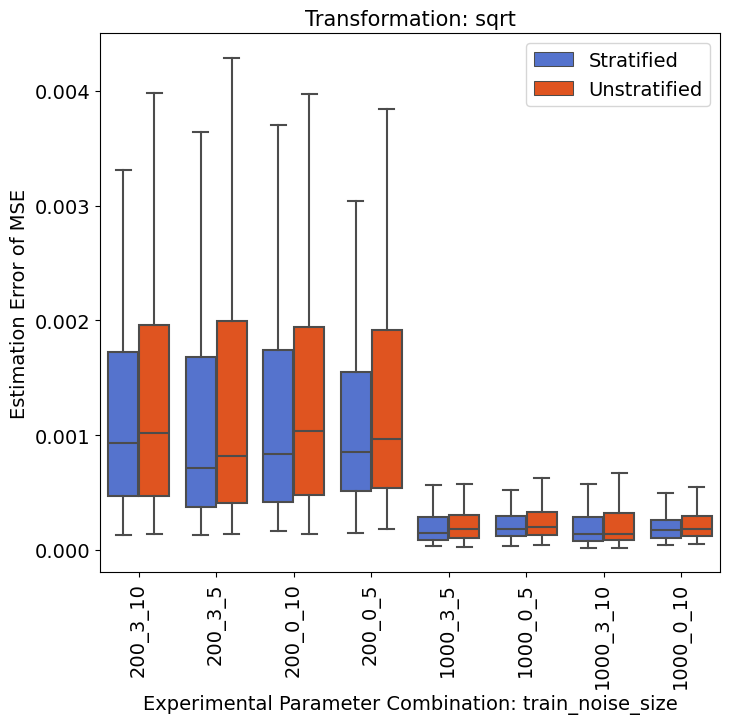

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
2                              1000_3_10        -0.000012      -0.000008   
0                              1000_0_10        -0.000020      -0.000015   
3                               1000_3_5        -0.000025      -0.000020   
1                               1000_0_5        -0.000026      -0.000013   
7                                200_3_5        -0.000157      -0.000246   
6                               200_3_10        -0.000158      -0.000112   
5                                200_0_5        -0.000196      -0.000198   
4                               200_0_10        -0.000241      -0.000238   

   Stratified  Unstratified  
2    0.000225      0.000236  
0    0.000201      0.000221  
3    0.000229      0.000254  
1    0.000223      0.000249  
7    0.001444      0.001601  
6    0.001588      0.001746  
5    0.001206      0.001402  
4    0.001263      0.001504  


In [91]:
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()
difference_overview_detailed = pd.DataFrame()

for model in models: 
    for transformation in transformations: 
        print(model)
        # filter data for transformation and model
        data_filtered = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]
        # plot
        differences_table_all = plot_eval(value_vars= ['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'] , 
                                           value_name = 'Estimation Error of MSE', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), 
                                           transformation = transformation, model = model, figsize = (8, 7))
        difference_overview_detailed = pd.concat([difference_overview_detailed, differences_table_all]).reset_index(drop=True)



In [79]:
difference_overview_detailed

,Expermintel Hyperparameter Combinaiton,Difference Mean,Difference SD,Stratified,Unstratified
0,1000_0_10,-1.797285e-02,-0.014962,0.118066,0.136038
1,1000_0_5,-1.599500e-02,-0.007391,0.114048,0.130043
2,1000_3_10,-4.465786e-02,-0.038729,0.405319,0.449977
3,1000_3_5,-1.615990e-02,0.016233,0.415301,0.431461
4,200_0_10,-1.365798e-01,-0.209442,0.853509,0.990089
5,200_0_5,-2.399979e-01,-0.211622,0.952482,1.192480
6,200_3_10,-4.845836e-01,-1.134639,3.186668,3.671252
7,200_3_5,-5.756758e-01,-1.773983,3.382900,3.958576
8,1000_0_10,-1.666627e-06,-0.000001,0.000016,0.000018
9,1000_0_5,-2.041316e-06,-0.000002,0.000012,0.000014


In [80]:
difference_overview_detailed[difference_overview_detailed['Difference Mean'] >0]

,Expermintel Hyperparameter Combinaiton,Difference Mean,Difference SD,Stratified,Unstratified


In [81]:
difference_overview_detailed[difference_overview_detailed['Difference SD'] >0]

,Expermintel Hyperparameter Combinaiton,Difference Mean,Difference SD,Stratified,Unstratified
3,1000_3_5,-1.615990e-02,0.016233,0.415301,0.431461
14,200_3_10,-7.329069e-07,0.000027,0.000065,0.000066
15,200_3_5,-3.099007e-06,0.000012,0.000079,0.000082
22,200_3_10,-3.997258e-05,0.000104,0.000838,0.000878
26,1000_3_10,-1.373894e-02,0.013535,0.642586,0.656325


### Convert table to latex

In [82]:
from tabulate import tabulate

# Assuming your data is stored in a DataFrame called df
latex_table = tabulate(differences_table_all, tablefmt="latex_raw", headers="keys", showindex=False)
print(latex_table)

\begin{tabular}{rrrrr}
\hline
   Expermintel Hyperparameter Combinaiton &   Difference Mean &   Difference SD &   Stratified &   Unstratified \\
\hline
                                1000_0_10 &      -2.00913e-05 &    -1.45829e-05 &  0.000201297 &    0.000221388 \\
                                 1000_0_5 &      -2.60095e-05 &    -1.3408e-05  &  0.000222894 &    0.000248904 \\
                                1000_3_10 &      -1.1596e-05  &    -8.47633e-06 &  0.000224895 &    0.000236491 \\
                                 1000_3_5 &      -2.46966e-05 &    -2.01186e-05 &  0.000229027 &    0.000253724 \\
                                 200_0_10 &      -0.000240531 &    -0.000238263 &  0.00126318  &    0.00150371  \\
                                  200_0_5 &      -0.000195769 &    -0.00019809  &  0.00120596  &    0.00140173  \\
                                 200_3_10 &      -0.000158017 &    -0.000112429 &  0.00158827  &    0.00174629  \\
                                  200_3_5 &

## Old

In [83]:

def plot_eval(value_vars , value_name, data, model_vars_title, transformation = 'None', model = 'None', figsize = (6, 3)):
        '''
        value_vars: list of strings, names of columns to be plotted for stratified and unstratified ['error_estimator_mean_stratified', 'error_estimator_mean_unstratified']. 
                        Important: stratified and unstratified must be written in the end after '_' otherwise automatic labeling won't work and you'll get an error
                        Important: stratifed first element, unstratified second element
        value_name: string, name of the value variable to be plotted. Basically name of value_vars that is plotted on the y-axis
        differences_table_all: pd.DataFrame, table of differences in mean and sd of stratified and unstratified , output of function with plots
        '''
        differences_table_all = pd.DataFrame()
        # make data long
        data_long = data.melt(id_vars=['param_model'], 
                                                value_vars= value_vars , 
                                                var_name='Stratification', value_name= value_name)

        # definer ordering of boxplots
        filtered_data = data_long[data_long['Stratification'] ==  value_vars[1]]
        mean_intersection = filtered_data.groupby(['param_model'])[value_name].mean().reset_index().sort_values(by= value_name, ascending=False)

        ### Deacreptives
        descriptives = data_long.groupby(['param_model', 'Stratification']).describe()
        keys = descriptives[value_name]['mean'].keys()
        # descriptives['Intesection']['count'].values  # check N per boxplot
        descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                                'Stratification': keys.get_level_values('Stratification').str.rsplit('_', n=1).str[-1], 
                                                'Mean': descriptives[value_name]['mean'].values, 
                                                'SD': descriptives[value_name]['std'].values})
        difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
        difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
        differences = pd.DataFrame({'Transformaiton': transformation, 'Model': model,  'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                                'Difference Mean': difference_mean, 
                                                'Difference SD': difference_sd,
                                                'Stratified': descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values,
                                                'Unstratified': descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values})
        differences_table_all = pd.concat([differences_table_all, differences])
        differences_table_all.sort_values(by='Difference Mean', ascending=False, inplace=True)


        ### Plot
        plt.figure(figsize= figsize)  # Set the figure size to 10 inches by 6 inches
        if model == 'None' and transformation != 'None':
                plt.title('Transformation ' + transformation )
        elif transformation == 'None' and model != 'None':
                plt.title('Model: ' + model)
        elif transformation != 'None' and model != 'None':
                plt.title('Ordered and grouped boxplot: ' + transformation + ' & ' + model.upper())
        else:
                plt.title('Ordered and grouped boxplot')
        sns.boxplot(x= data_long['param_model'], 
                        y= data_long[value_name], 
                        hue= data_long['Stratification'],  palette={value_vars[0]: '#990073', 
                        value_vars[1]: 'darkgreen'}, 
                        showfliers=False, # hide outliers
                        order = list(mean_intersection['param_model']))  #showmeans=True, meanline=True
        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.ylabel(value_name)
        plt.xlabel('Hyperparameter Combination: '+ model_vars_title)
        legend = plt.legend()
        for i, label in enumerate(legend.get_texts()):
                if label.get_text() == value_vars[0]:
                        label.set_text('Stratified')
                elif label.get_text() == value_vars[1]:
                        label.set_text('Unstratified')
        plt.show()
        differences.sort_values(by='Difference Mean', ascending=False, inplace=True)
        print(differences)
        return differences_table_all

### Plots for XGB and RF

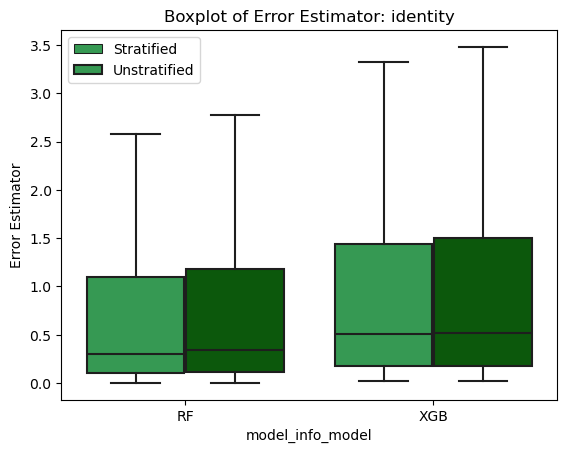

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     RF     stratified  1.178537  2.707050
1                                     RF   unstratified  1.369989  3.454643
2                                    XGB     stratified  1.345669  2.379954
3                                    XGB   unstratified  1.427758  2.675284


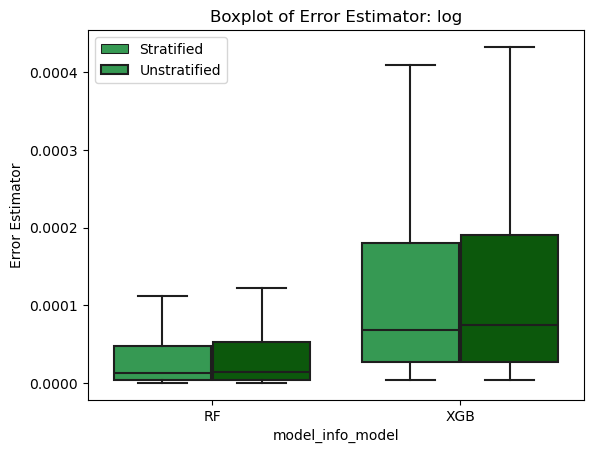

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     RF     stratified  0.000060  0.000162
1                                     RF   unstratified  0.000066  0.000169
2                                    XGB     stratified  0.000176  0.000313
3                                    XGB   unstratified  0.000189  0.000341


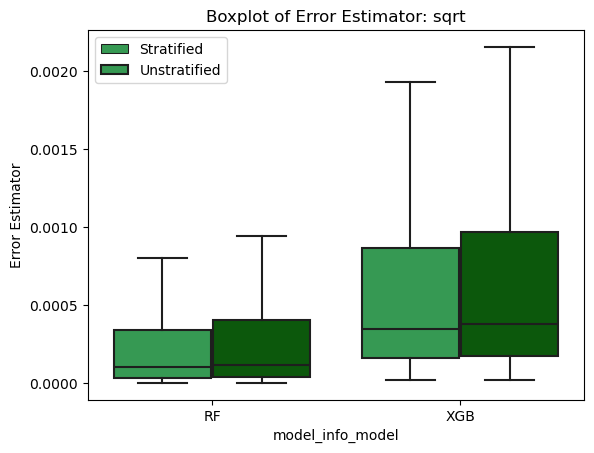

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     RF     stratified  0.000359  0.000814
1                                     RF   unstratified  0.000396  0.000823
2                                    XGB     stratified  0.000797  0.001311
3                                    XGB   unstratified  0.000902  0.001465


In [84]:
transformations = data['model_info_transformation'].unique()

for transformation in transformations:
    data_error= data[data['model_info_transformation'] == transformation]
    # make data long
    data_error_long = data_error.melt(id_vars=['model_info_model'], 
                                               value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                               var_name='stratification', value_name='error')


    sns.boxplot(x=data_error_long['model_info_model'], 
                y=data_error_long['error'], 
                hue=data_error_long['stratification'], 
                palette=['#26A94C', 'darkgreen'],
                showfliers=False, )  # hide outliers
    plt.legend(labels=['Stratified', 'Unstratified'])
    plt.ylabel('Error Estimator')
    plt.title('Boxplot of Error Estimator: ' + transformation)
    plt.show()

    # check N per boxplot
    grouped = data_error_long.groupby(['model_info_model', 'stratification'])
    grouped.size().reset_index(name='counts')
    data.groupby(['model_info_model', 'model_info_transformation']).size().reset_index(name='counts')

    # Descreptive table
    descriptives = grouped.describe()
    keys = descriptives['error']['mean'].keys()
    descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('model_info_model'), 
                                       'Stratification': keys.get_level_values('stratification').str.rsplit('_', n=1).str[-1], 
                                       'Mean': descriptives['error']['mean'].values, 
                                       'SD': descriptives['error']['std'].values})
    print(descriptives_table)


### First version: Boxpot Estimation Error per unique experimental parameter combination
Boxplots per unique experimental parameter combination comparing strativied vs. unstratified: 

In [85]:
'''
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()
differences_table_all = pd.DataFrame()

for model in models: 
    for transformation in transformations:
       
        data_error = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]

        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                                var_name='stratification', value_name='error')
        data_error_long.groupby(['param_model', 'stratification'])
        data_error_long.sort_values(['param_model'])  
        
        #plot
        plt.title('Boxplot of Error Estimator: ' + transformation + ' & ' + model)
        sns.boxplot(x=data_error_long['param_model'], 
                    y=data_error_long['error'], 
                    hue=data_error_long['stratification'], 
                    palette=['#26A94C', 'darkgreen'],
                    showfliers=False, )  # hide outliers
        plt.legend(labels=['Stratified', 'Unstratified'], loc='lower right')
        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.show()

        # check N per boxplot
        grouped = data_error_long.groupby(['param_model', 'stratification'])
        grouped.size().reset_index(name='counts')
        data.groupby(['model_info_model', 'model_info_transformation']).size().reset_index(name='counts')
        # Deacreptive table
        descriptives = grouped.describe()
        keys = descriptives['error']['mean'].keys()
        descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                           'Stratification': keys.get_level_values('stratification').str.rsplit('_', n=1).str[-1], 
                                           'Mean': descriptives['error']['mean'].values, 
                                           'SD': descriptives['error']['std'].values})
        difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
        difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
        differences = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                           'Difference Mean': difference_mean, 
                                           'Difference SD': difference_sd})
        differences_table_all = pd.concat([differences_table_all, differences])
        print(descriptives_table)
        print(differences)   
'''

"\ntransformations = data['model_info_transformation'].unique()\nmodels = data['model_info_model'].unique()\ndifferences_table_all = pd.DataFrame()\n\nfor model in models: \n    for transformation in transformations:\n       \n        data_error = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]\n\n        # make data long\n        data_error_long = data_error.melt(id_vars=['param_model'], \n                                                value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], \n                                                var_name='stratification', value_name='error')\n        data_error_long.groupby(['param_model', 'stratification'])\n        data_error_long.sort_values(['param_model'])  \n        \n        #plot\n        plt.title('Boxplot of Error Estimator: ' + transformation + ' & ' + model)\n        sns.boxplot(x=data_error_long['param_model'], \n                    y=data_error_lon

### Updated version: Boxpot Estimation Error per unique experimental parameter combination
With ordering and other colouring

In [86]:
'''
differences_table_all = pd.DataFrame()
# rename colums that startified and unstratified is written at the end
#data = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})

transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()


for model in models: 
    for transformation in transformations:
       
        data_error = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]

        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                                var_name='stratification', value_name='error')

        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                        value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                                        var_name='Stratification', value_name='Error')

        # definer ordering of boxplots
        filtered_data = data_error_long[data_error_long['Stratification'] == 'error_estimator_mean_unstratified']
        mean_intersection = filtered_data.groupby(['param_model'])['Error'].mean().reset_index().sort_values(by='Error', ascending=False)

        ### Deacreptives
        descriptives = data_error_long.groupby(['param_model', 'Stratification']).describe()
        keys = descriptives['Error']['mean'].keys()
        # descriptives['Intesection']['count'].values  # check N per boxplot
        descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                                'Stratification': keys.get_level_values('Stratification').str.rsplit('_', n=1).str[-1], 
                                                'Mean': descriptives['Error']['mean'].values, 
                                                'SD': descriptives['Error']['std'].values})
        difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
        difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
        differences = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                                'Difference Mean': difference_mean, 
                                                'Difference SD': difference_sd})
        differences_table_all = pd.concat([differences_table_all, differences])


        ### Plot
        plt.figure(figsize=(6, 3))  # Set the figure size to 10 inches by 6 inches
        plt.title('Boxplot of Estimaton Error: ' + transformation + '&' + model)
        sns.boxplot(x= data_error_long['param_model'], 
                        y= data_error_long['Error'], 
                        hue= data_error_long['Stratification'],  palette={'error_estimator_mean_stratified': '#990073', 
                        'error_estimator_mean_unstratified': 'darkgreen'}, 
                        showfliers=False, # hide outliers
                        order = list(mean_intersection['param_model']))  #showmeans=True, meanline=True
        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.ylabel('Estimator Error')
        plt.xlabel('Hyperparameter Combination: n_train, noise, group_size')
        legend = plt.legend()
        for i, label in enumerate(legend.get_texts()):
                if label.get_text() == 'error_estimator_mean_stratified':
                        label.set_text('Stratified')
                elif label.get_text() == 'error_estimator_mean_unstratified':
                        label.set_text('Unstratified')
        plt.show()

        differences.sort_values(by='Difference Mean', ascending=False, inplace=True)
        print(differences)
'''

"\ndifferences_table_all = pd.DataFrame()\n# rename colums that startified and unstratified is written at the end\n#data = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})\n\ntransformations = data['model_info_transformation'].unique()\nmodels = data['model_info_model'].unique()\n\n\nfor model in models: \n    for transformation in transformations:\n       \n        data_error = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]\n\n        # make data long\n        data_error_long = data_error.melt(id_vars=['param_model'], \n                                                value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], \n                                                var_name='stratification', value_name='error')